# Unsupervised machine learning

## Main Objective
- In this dataset, we are going to detect possible anomalies or frauds using different types of clustering or dimensionality reduction.
- This has a lot of benefits in finance, since it can lower the fraud activity that a bank or fintech has,a llowing the customer to have more reliability on the company.

## Dataset description
- I've downloaded this dataset from Kaggle.
- This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.
- We have 2512 rows with 16 columns. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bank_transactions_data_2.csv')

In [4]:
BankDataKMeans = data

In [5]:
BankDataKMeans.shape

(2512, 16)

In [38]:
BankDataKMeans.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

Let's have a look into the data

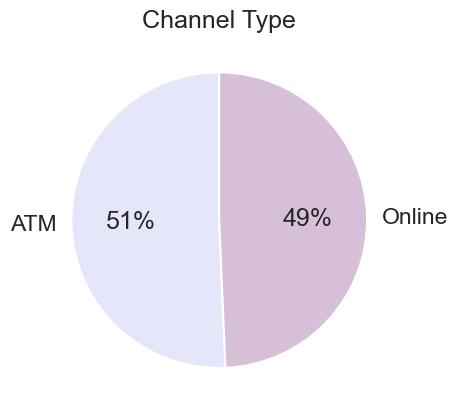

In [39]:
num_ATM = data[data['Channel'] == 'ATM'].shape[0]
num_Online = data[data['Channel'] == 'Online'].shape[0]
plt.pie(
    [num_ATM, num_Online],
    labels=['ATM', 'Online'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle'])
plt.title('Channel Type')
plt.show()

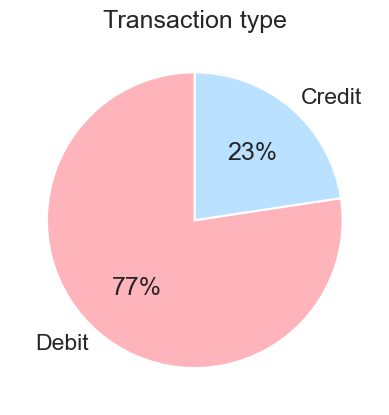

In [40]:
num_Debit = data[data['TransactionType'] == 'Debit'].shape[0]
num_Credit = data[data['TransactionType'] == 'Credit'].shape[0]
plt.pie(
    [num_Debit, num_Credit],
    labels=['Debit', 'Credit'],
    startangle=90,
    autopct='%1.f%%',
    colors=['#FFB3BA', '#BAE1FF'])
plt.title('Transaction type')
plt.show()

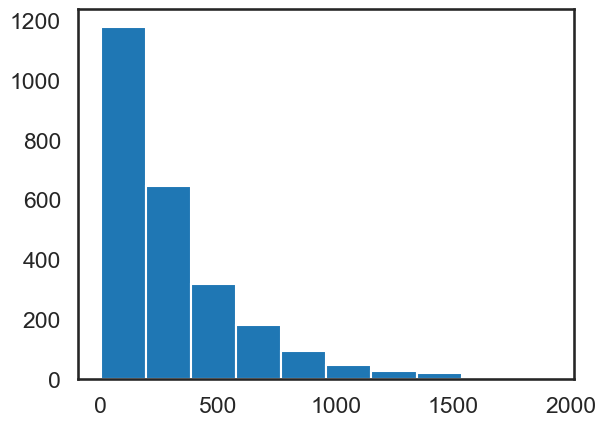

In [41]:
plt.hist(BankDataKMeans['TransactionAmount'], bins=10)
plt.show()

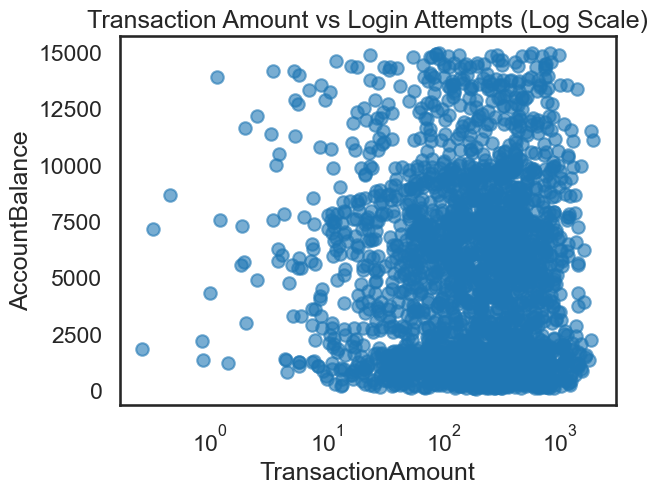

In [42]:
xlabel = 'TransactionAmount'
ylabel = 'AccountBalance'

X = BankDataKMeans[[xlabel, ylabel]]

plt.scatter(X[xlabel], X[ylabel], alpha=0.6)
plt.xscale("log")  # Escala logarítmica en eje X
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Transaction Amount vs Login Attempts (Log Scale)")
plt.show()

## Model Training and variation
To evaluate different approaches, three variations of unsupervised models were trained and compared:

- K-Means Clustering

-- Tested with different values of k (from 2 to 6).

-- Evaluation metric: Silhouette Score and Inertia to determine the optimal number of clusters.

-- Key observation: Performance improved until k = 3, after which the improvement diminished.

- Gaussian Mixture Models (GMM)

-- Trained with different numbers of components (2 to 5).

-- Evaluation metric: Bayesian Information Criterion (BIC) and log-likelihood.

-- Key observation: GMM provided more flexibility in defining cluster boundaries compared to K-Means.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

-- Tested different values for eps (0.3, 0.5, 0.7) and min_samples (5, 10).

-- Evaluation metric: percentage of noise points and cluster stability.

-- Key observation: DBSCAN successfully detected outliers but produced unbalanced cluster sizes.

- In addition, dimensionality reduction with PCA was applied before clustering to visualize the clusters in two dimensions and reduce noise in the data.

In [43]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

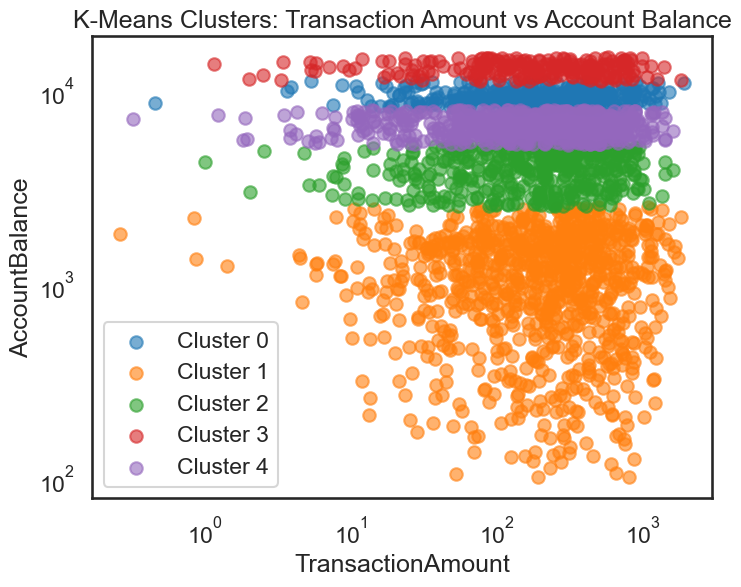

In [44]:
plt.figure(figsize=(8,6))
for label in np.unique(km.labels_):
    cluster_points = X[km.labels_ == label]
    plt.scatter(
        cluster_points[xlabel], 
        cluster_points[ylabel], 
        label=f'Cluster {label}', 
        alpha=0.6
    )

plt.xscale('log') 
plt.yscale('log')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('K-Means Clusters: Transaction Amount vs Account Balance')
plt.legend()
plt.show()

# Gaussian Mixture
Now we are going to try gaussian mixture since it allow us to be more flecible, also GMM it gave us the belonging probability to every cluster, so that way we can identify a little bit more fraudulent transactions. 

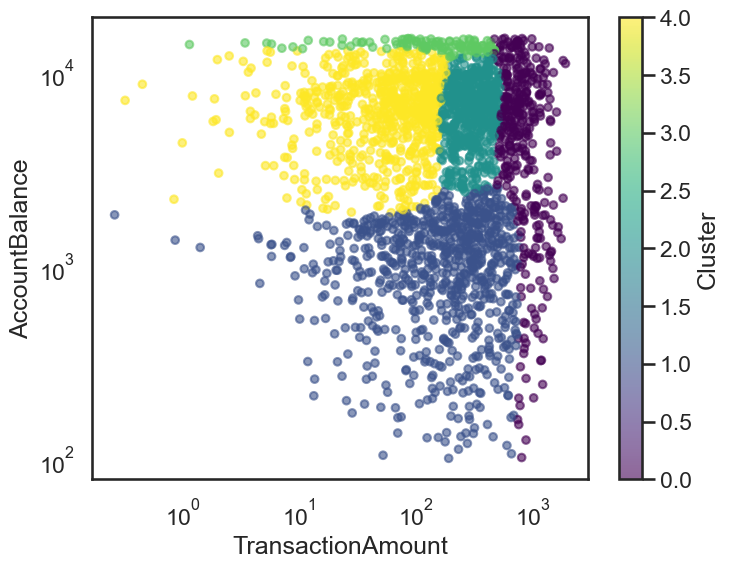

In [45]:
from sklearn.mixture import GaussianMixture

X_gmm = BankDataKMeans[['TransactionAmount', 'AccountBalance']]

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(X_gmm)
labels = gmm.predict(X_gmm)
probs = gmm.predict_proba(X_gmm)

plt.figure(figsize=(8,6))
plt.scatter(
    X_gmm['TransactionAmount'], 
    X_gmm['AccountBalance'], 
    c=labels, 
    cmap='viridis', 
    s=30, 
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

## Insights
We have more irregular forms that our K-mean model.
Also we see some groups of users:
- A group od low account balance and low transaction amount
- Another group with high account balance with low transaction amount
- And another group with high account balance with high transaction amount

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

In [56]:
cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']
DBSCANdata= data[cols]

In [57]:
scaler = StandardScaler()
DBSCANdata = scaler.fit_transform(DBSCANdata)

In [75]:
dbscan = DBSCAN(eps=1.5, min_samples=15) 
labels = dbscan.fit_predict(DBSCANdata)

In [76]:
data['DBSCAN_Cluster'] = labels

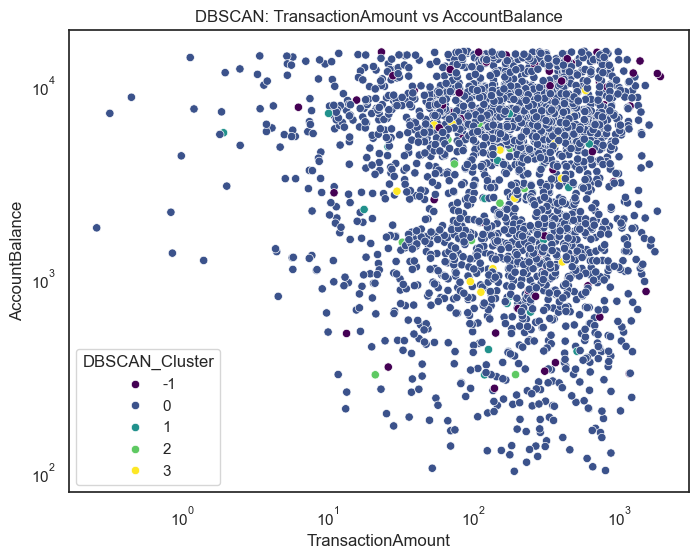

DBSCAN_Cluster
 0    2387
-1      64
 1      24
 3      22
 2      15
Name: count, dtype: int64


In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=BankDataKMeans['TransactionAmount'],
    y=BankDataKMeans['AccountBalance'],
    hue=BankDataKMeans['DBSCAN_Cluster'],
    palette='viridis',
    legend='full'
)
plt.xscale('log')
plt.yscale('log')
plt.title("DBSCAN: TransactionAmount vs AccountBalance")
plt.show()

print(BankDataKMeans['DBSCAN_Cluster'].value_counts())

This has a better interpretation, since the noise we can identify them as possible fraud transactions or anomaly transactions, we can extract them and see a little bit more about them.

In [86]:
outliers_df = data[labels == -1]
print(outliers_df.head())
print(f"Total posibles fraudes detectados: {outliers_df.shape[0]}")

    TransactionID AccountID  TransactionAmount      TransactionDate  \
38       TX000039   AC00478             795.31  2023-10-12 17:07:40   
61       TX000062   AC00002             263.99  2023-05-16 16:07:30   
117      TX000118   AC00498              56.98  2024-01-01 16:34:10   
167      TX000168   AC00332             506.28  2023-05-02 17:03:29   
231      TX000232   AC00430             705.60  2023-02-20 18:41:43   

    TransactionType       Location DeviceID     IP Address MerchantID Channel  \
38            Debit           Mesa  D000077   49.29.37.185       M048     ATM   
61            Debit         Dallas  D000285   7.146.35.122       M087  Branch   
117          Credit  Oklahoma City  D000256  101.90.40.193       M086     ATM   
167          Credit        Chicago  D000606  110.150.1.201       M010  Online   
231           Debit        Phoenix  D000103  205.45.234.42       M071  Branch   

     CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
38         

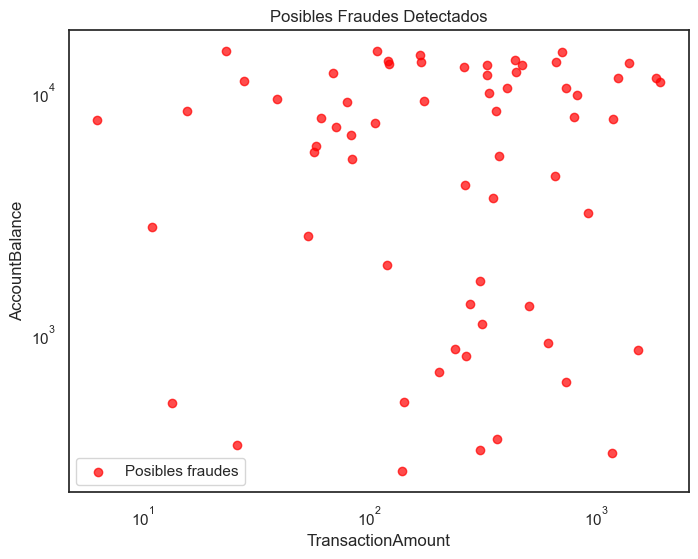

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(outliers_df['TransactionAmount'],
            outliers_df['AccountBalance'],
            c='red', label='Posibles fraudes', alpha=0.7)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.title('Posibles Fraudes Detectados')
plt.legend()
plt.show()

# Applying PCA
Let's try to transform our dataset dimensions to less, so we can have a better performance

In [48]:
data = data.drop(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate'], axis=1)

In [49]:
data.dtypes

TransactionAmount      float64
CustomerAge              int64
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object

In [50]:
for col in data.columns:
    data[col] = data[col].astype(np.float64)

In [51]:
data_orig = data.copy()

In [52]:
corr_mat = data.corr()

for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,0.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,0.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,0.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,0.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,0.000000


In [53]:
corr_mat.abs().idxmax()

TransactionAmount              CustomerAge
CustomerAge                 AccountBalance
TransactionDuration          LoginAttempts
LoginAttempts          TransactionDuration
AccountBalance                 CustomerAge
dtype: object

In [54]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

LoginAttempts        5.173491
TransactionAmount    1.740107
dtype: float64

In [55]:
for col in log_columns.index:
    data[col] = np.log1p(data[col])

In [56]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

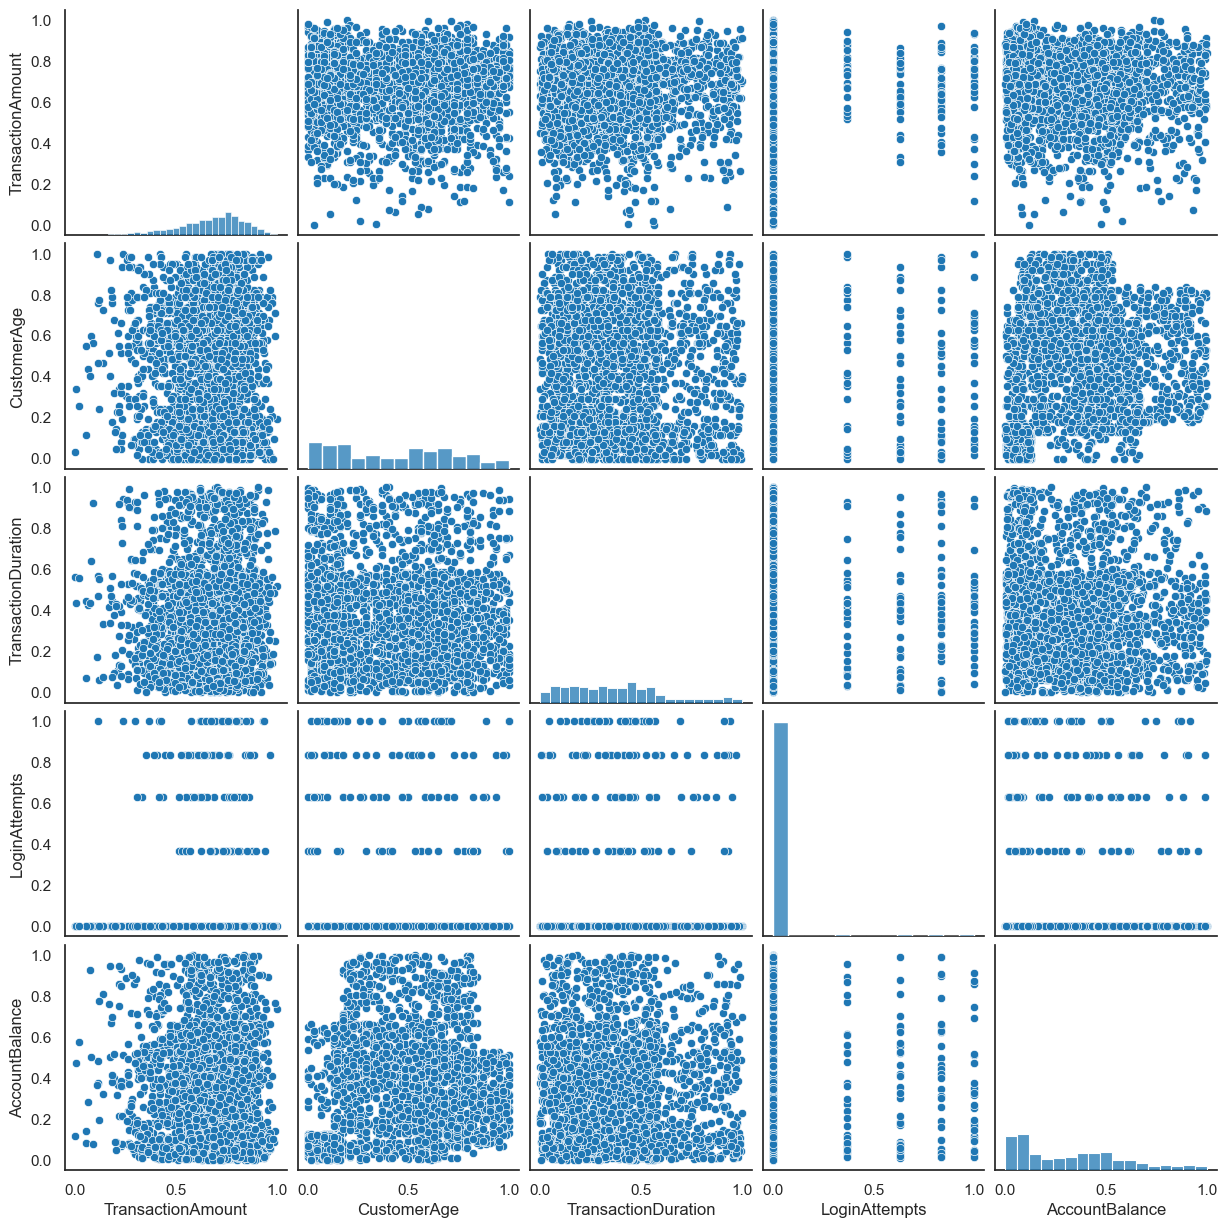

In [57]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data);

In [58]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

log_transformer = FunctionTransformer(np.log1p)

estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

data_pipe = pipeline.fit_transform(data_orig)

In [59]:
np.allclose(data_pipe, data)

False

In [60]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()


for n in range(1, 6):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.381623
2,PCA(n_components=2),0.603007
3,PCA(n_components=3),0.794138
4,PCA(n_components=4),0.898852
5,PCA(n_components=5),1.0


In [61]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,AccountBalance,CustomerAge,LoginAttempts,TransactionAmount,TransactionDuration
n,,,,,
1,0.414472,0.547851,0.006332,0.018955,0.012390
2,0.269034,0.322893,0.019812,0.011110,0.377151
3,0.357546,0.346995,0.014961,0.009893,0.270606
4,0.286809,0.275952,0.029796,0.193580,0.213863
5,0.238492,0.227562,0.177333,0.174213,0.182400


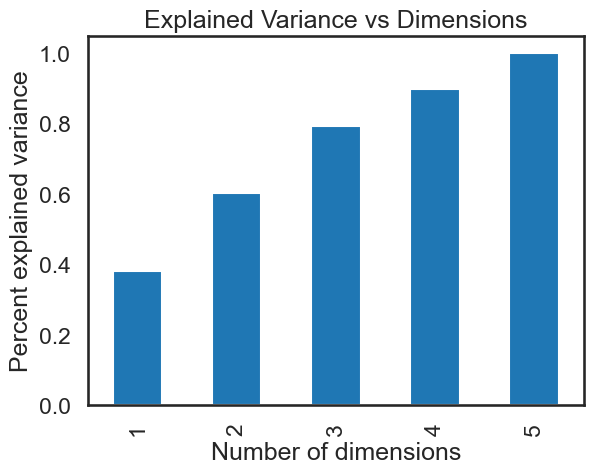

In [62]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

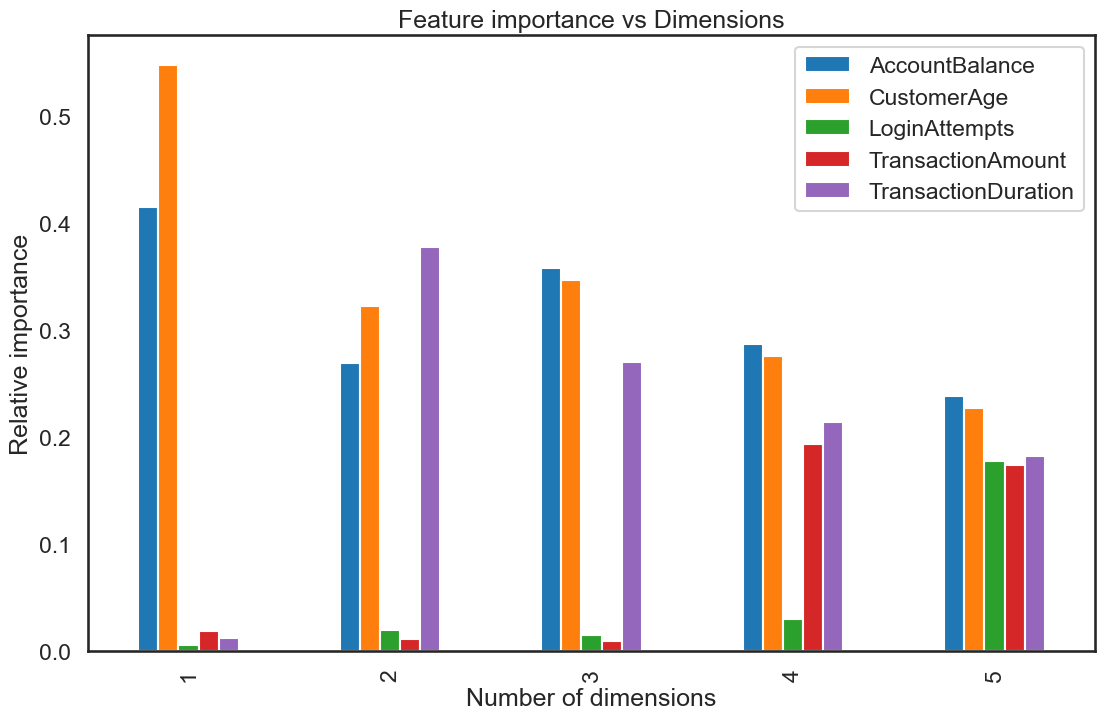

In [63]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

Let's go and apply PCA, I will choose 3 components since I want to plot it in 3d, but we can choose either 2 or 4, based on our explained variance.

In [64]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data)

In [65]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

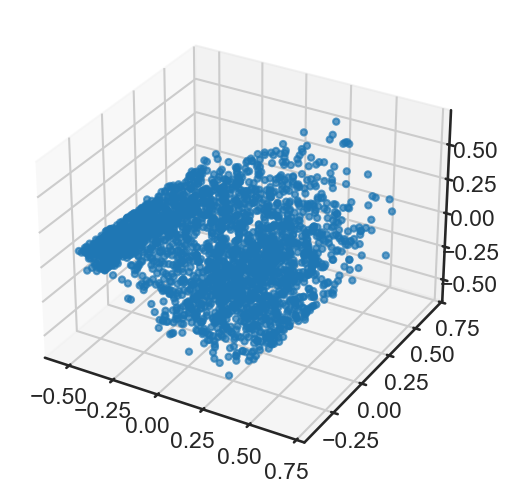

In [66]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7)

plt.show()

Here, we don-t have a clear look aout the different groups that we had with our PCA, so we will have to apply Kmeans or another algorithm, I will use Gaussian mixture.

In [74]:
num = data.select_dtypes(include=[np.number]).copy()

In [75]:
bic = []
models = []

for k in range(2, 9):                 
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        n_init=5,
        random_state=42
    ).fit(num.values)
    bic.append(gmm.bic(num.values))
    models.append(gmm)

best_idx = int(np.argmin(bic))
best_gmm = models[best_idx]

In [76]:
gmm_labels = best_gmm.predict(num.values)            # etiquetas de cluster
gmm_proba  = best_gmm.predict_proba(num.values)      # prob. pertenencia a cada cluster

data['gmm_label']   = gmm_labels
data['gmm_maxprob'] = gmm_proba.max(axis=1) 

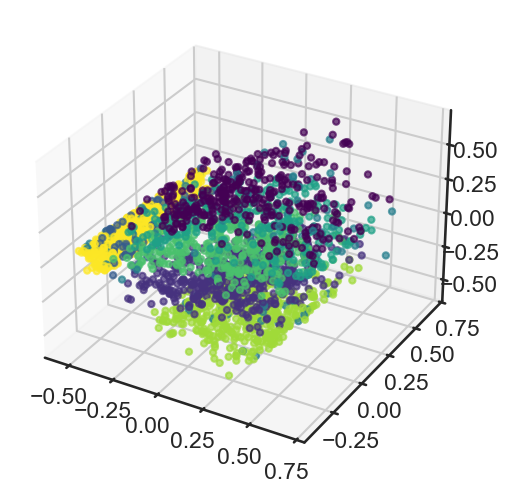

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca['PC1'], 
    df_pca['PC2'], 
    df_pca['PC3'], 
    c=gmm_labels, 
    cmap='viridis', 
    alpha=0.7
)

Now it's clearly that we have 5 different groups, that we can look into it so we can detect anomaly transactions. 

## Recommended Model